In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Aim of activity

Create a convolutional function that takes a mask and applies it to an image

It should:
- work with grayscale and RGB
- use zero padding

### Define functions

In [2]:
def perform_single_convolution(img: np.ndarray[float], mask:np.ndarray[float], x_idx: int, y_idx: int) -> np.ndarray[float]:
    # Get shape of mask
    mask_width = mask.shape[0]
    mask_height = mask.shape[1]
    # Find number of steps each side of mask
    mask_x_border = int((mask_width+1)/2)
    mask_y_border = int((mask_height+1)/2)
    # Create a list of indices for each side of the centre point
    window_x_indices = [x_idx - i for i in reversed(range(1, mask_x_border))] + [x_idx + i for i in range(mask_x_border)]
    window_y_indices = [y_idx - i for i in reversed(range(1, mask_y_border))] + [y_idx + i for i in range(mask_y_border)]
    # Create base window 
    window = np.zeros((mask_width, mask_height))
    for i_m, i_w in zip(range(mask_width), window_x_indices):
        for j_m, j_w in zip(range(mask_height), window_y_indices):
            if i_w<0 or j_w<0:
                window[i_m,j_m] = 0
            elif i_w>=img.shape[0] or j_w>=img.shape[1]:
                window[i_m,j_m] = 0
            else:
                window[i_m,j_m] = img[i_w,j_w]
    # Perform convolution
    return np.sum(window * mask)

In [3]:
def convolute_single_layer(img: np.ndarray[float], mask:np.ndarray[float]) -> np.ndarray[float]:
    img_out = img.copy()
    img_width = img.shape[0]
    img_height = img.shape[1]
    for i in range(img_width):
        for j in range(img_height):
            img_out[i, j] = perform_single_convolution(img, mask, i, j)
    return img_out

In [4]:
def convolute_multiple_layers(img: np.ndarray[float],
                              mask:np.ndarray[float],
                              verbose: bool = False) -> np.ndarray[float]:
    if len(img.shape) == 2:
        if verbose:
            print('Grayscale image detected, applying mask.')
        return convolute_single_layer(img, mask)
    else:
        if verbose:
            print('Multiple layers detected')
        layers = []
        for i in range(img.shape[2]):
            layers.append(img[:,:,i])
        if verbose:
            print(f'Collected {len(layers)} layers, applying masks.')
        convoluted_layers = []
        for i, layer in enumerate(layers):
            convoluted_layers.append(convolute_single_layer(layer, mask))
            if verbose:
                print(f'Applied mask {len(convoluted_layers)} of {len(layers)}.')
        return np.stack(convoluted_layers, -1)
        

In [5]:
def display_before_and_after(img: np.ndarray[float],
                             mask:np.ndarray[float],
                             verbose: bool = False) -> None:
    img_out = convolute_multiple_layers(img, mask, verbose)
    if len(img.shape) == 2:
        cmap = 'gray'
    else:
        cmap = 'viridis'
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))
    ax1.imshow(img, cmap=cmap)
    ax2.imshow(img_out, cmap=cmap)
    ax1.set(title='Original')
    ax2.set(title='Convoluted')

### Read in image and create mask

In [6]:
# Read in image
img = plt.imread('../../Data/bird.png')
img = img[:,:,:3]
img_gray = 0.2989*img[:,:,0] + 0.5870*img[:,:,1] + 0.1140*img[:,:,2]

# Create blur mask
mask_blur_dims = (15,15)
mask_blur_squares = mask_blur_dims[0]*mask_blur_dims[1]
mask_blur = np.ones(mask_blur_dims)/mask_blur_squares

### Apply functions

In [7]:
display_before_and_after(img_gray, mask_blur, True)

Grayscale image detected, applying mask.


Multiple layers detected
Collected 3 layers, applying masks.
Applied mask 1 of 3.
Applied mask 2 of 3.
Applied mask 3 of 3.


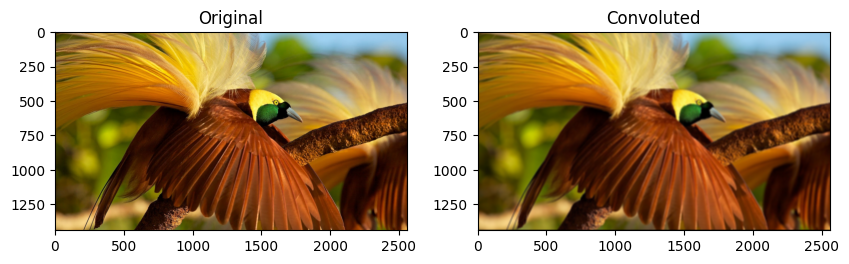

In [ ]:
display_before_and_after(img, mask_blur, True)